<a href="https://colab.research.google.com/github/vishalpuri07/VISHAL_INFO5731_FALL2021/blob/main/Geolocation_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import geopandas as gpd
from geopandas import GeoDataFrame


In [ ]:
Geolocation plot and clustering plot - https://github.com/vishalpuri07/VISHAL_INFO5731_FALL2021/blob/main/Geolocation_and_clustering.ipynb


In [ ]:
# Import the training and testing dataset and convert it to dataframe for easy data cleaning.
from google.colab import files
uploaded = files.upload()

Saving Locations.csv to Locations (2).csv


In [ ]:
df_locations = pd.read_csv("Locations.csv")
df_locations

,0,1
0,-74.025331,40.769124
1,4.601379,52.006802
2,-104.734372,39.812975
3,-113.375347,51.940658
4,-74.955712,40.137920
...,...,...
3373,122.107867,16.760317
3374,-122.357031,37.833238
3375,-93.194578,45.051257
3376,-79.974307,31.001056


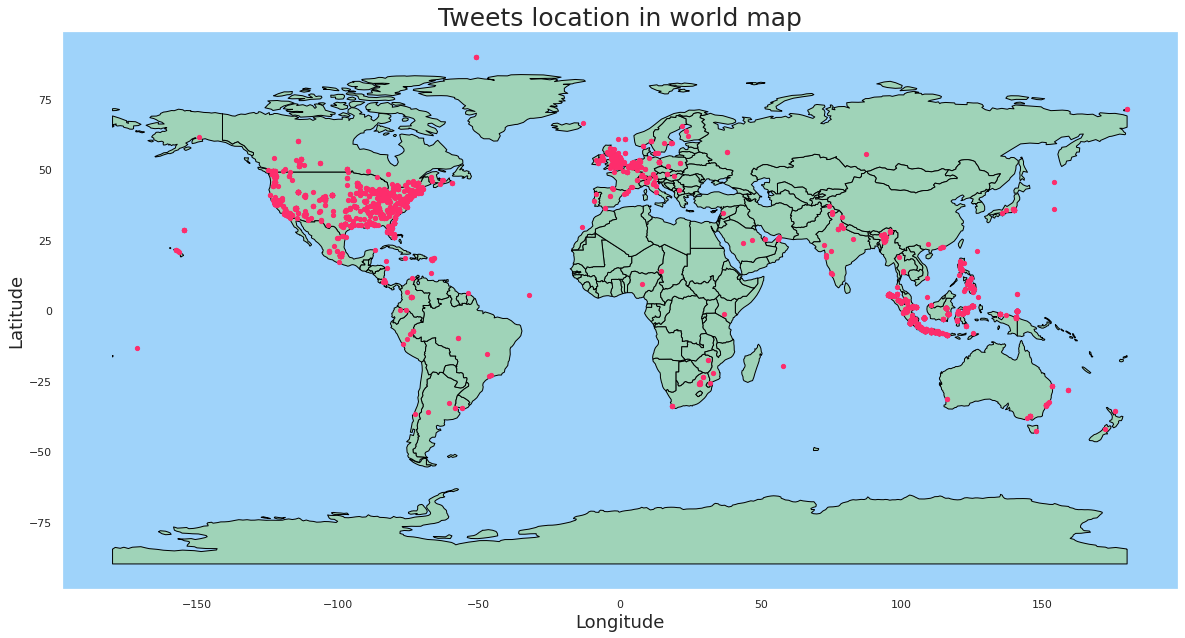

In [ ]:
geometry = [Point(xy) for xy in zip(df_locations['0'], df_locations['1'])]
gdf = GeoDataFrame(df_locations, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig = gdf.plot(ax=world.plot(figsize=(20, 12),facecolor = "#9fd3b8",edgecolor = "black"), marker='o', color='#fd2d6c', markersize=18);
plt.xlabel("Longitude",fontsize = 18);
plt.ylabel("Latitude", fontsize = 18);
plt.title("Tweets location in world map",fontsize = 25);
plt.grid(visible = None)
fig.set_facecolor("#9fd3fa")

In [ ]:
df_locations = df_locations.drop(columns = ["geometry"])
df_locations = df_locations.rename(columns = {"0":"longitude","1":"latitude"})
df_locations

,longitude,latitude
0,-74.025331,40.769124
1,4.601379,52.006802
2,-104.734372,39.812975
3,-113.375347,51.940658
4,-74.955712,40.137920
...,...,...
3373,122.107867,16.760317
3374,-122.357031,37.833238
3375,-93.194578,45.051257
3376,-79.974307,31.001056


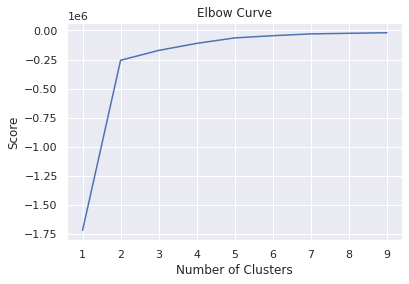

In [ ]:
df = df_locations
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
X=df.loc[:,['latitude','longitude']]
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[0:2]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[0:2]]) # Labels of each point

In [ ]:
centers = kmeans.cluster_centers_
new_df = pd.DataFrame(data=centers[0:,0:],columns=["latitude","longitude"])
new_df["labels"] = ["West_coast USA","B","c","d"]  # 1st row as the column names

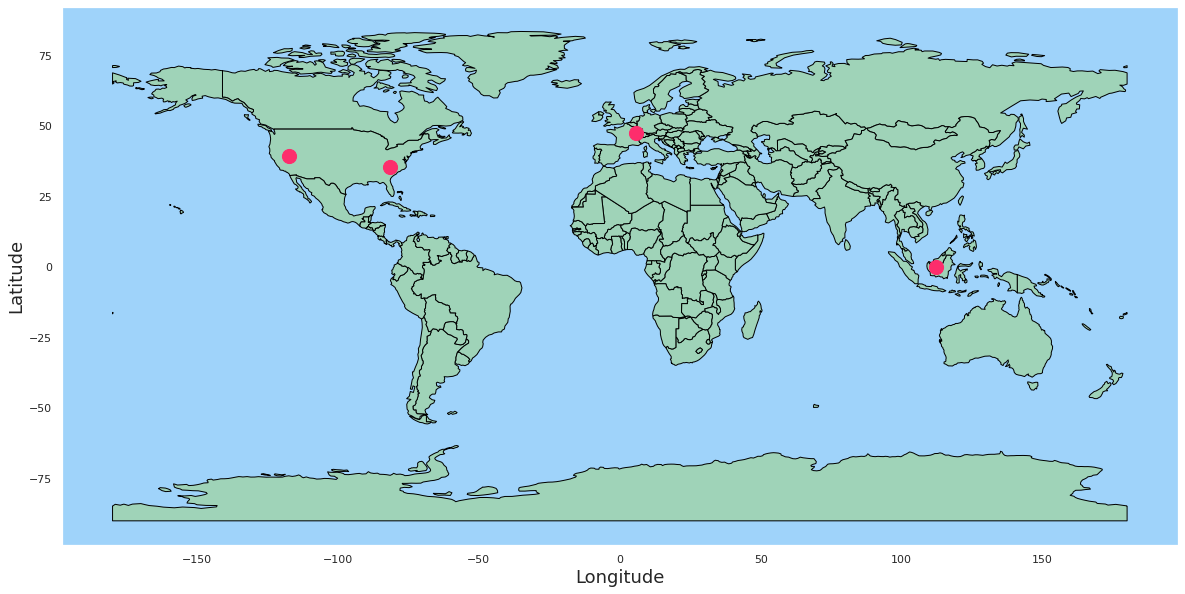

In [ ]:
geometry = [Point(xy) for xy in zip(new_df['longitude'], new_df['latitude'])]
gdf = GeoDataFrame(new_df, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig = gdf.plot(ax=world.plot(figsize=(20, 12),facecolor = "#9fd3b8",edgecolor = "black"), marker='o', color='#fd2d6c', markersize=200);
plt.xlabel("Longitude",fontsize = 18);
plt.ylabel("Latitude", fontsize = 18);
plt.grid(visible = None)
fig.set_facecolor("#9fd3fa")